# YouTube NLP

## Ingesting Comments from the YouTube Video

In [10]:
api_key = ''

In [11]:
from googleapiclient.discovery import build

# The string after v=? in the url
video_id = "dQw4w9WgXcQ"

# creating youtube resource object
youtube = build('youtube', 'v3',
developerKey=api_key)

# retrieve youtube video results
video_response=youtube.commentThreads().list(
  part='snippet',
  maxResults=1000,
  order='relevance',
  videoId=video_id
).execute()


## Data Preprocessing

### Data Wrangling

#### Assumptions


*   Picking only the comment made by the original author
  *   Comment Threads on the Original Authors comment could be diverging from the video
  *   Limiting Response to about 10 for testing

*   Using the 'textOriginal' instead of 'textDisplay' for easier cleanup of the comment


*   Analyzing only English Comments 
  *   Storing the number of non English comments for metrics








In [12]:
# empty list for storing reply
comments = []

# extracting required info from each result object
for item in video_response['items']:

  # Extracting comments
  comment = item['snippet']['topLevelComment']['snippet']['textOriginal']
  # Extracting author
  author = item['snippet']['topLevelComment']['snippet']['authorDisplayName']
  # Extracting published time
  published_at = item['snippet']['topLevelComment']['snippet']['publishedAt']
  # Extracting likes
  like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
  # Extracting total replies to the comment
  reply_count = item['snippet']['totalReplyCount']

  comments.append([author, comment, published_at, like_count, reply_count])

In [13]:
comments[0:5]

[['Rick Astley',
  '1 BILLION views for Never Gonna Give You Up!\xa0 Amazing, crazy, wonderful! Rick ♥️',
  '2021-07-28T21:00:32Z',
  1166879,
  497],
 ['H1K',
  "This isn't your first time here\nAnd you know it.",
  '2019-10-31T21:38:49Z',
  994100,
  494],
 ['Alain Flores',
  'Esta canción es genial,tanto tiempo y no ha Sido olvidada',
  '2023-01-02T16:48:50Z',
  329,
  15],
 ['Lukas',
  'Naah... temardo en verdad 😎🤙\r\n32707124 personas ya lo han escuchado,\r\nespero que te haya gustado 😉',
  '2023-01-02T16:26:56Z',
  326,
  10],
 ['breaking of the game 067',
  'Aparte de auto rickroll es muy buena fue un tema que no puede salir mas de su perfeccion fuera de los memes',
  '2023-01-02T20:58:42Z',
  78,
  3]]

### NLP

#### Install Libraries

In [14]:
pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 6.1 MB/s eta 0:00:00


In [15]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=8c2bcb0abc3ba4c58d7d13cab122fbf779621683b20cc0e742873b6f86de4d73
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [16]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 52.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=ff859183f72034cd3507b03229a164ed0ca5a6764281e376139d43ee61a65515
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry


In [17]:
pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Text Processing

In [18]:
import pandas as pd
df = pd.DataFrame({'Author': [i[0] for i in comments], 'Comment': [i[1] for i in comments], 'Timestamp': [i[2] for i in comments],
                  'Likes': [i[3] for i in comments], 'TotalReplies': [i[4] for i in comments]})

In [19]:
df.head()

,Author,Comment,Timestamp,Likes,TotalReplies
0,Rick Astley,1 BILLION views for Never Gonna Give You Up! ...,2021-07-28T21:00:32Z,1166879,497
1,H1K,This isn't your first time here\nAnd you know it.,2019-10-31T21:38:49Z,994100,494
2,Alain Flores,"Esta canción es genial,tanto tiempo y no ha Si...",2023-01-02T16:48:50Z,329,15
3,Lukas,Naah... temardo en verdad 😎🤙\r\n32707124 perso...,2023-01-02T16:26:56Z,326,10
4,breaking of the game 067,Aparte de auto rickroll es muy buena fue un te...,2023-01-02T20:58:42Z,78,3


In [37]:
!pip list | grep 'google'

google                        2.0.3
google-api-core               2.11.0
google-api-python-client      2.70.0
google-auth                   2.15.0
google-auth-httplib2          0.1.0
google-auth-oauthlib          0.4.6
google-cloud-bigquery         3.4.1
google-cloud-bigquery-storage 2.17.0
google-cloud-core             2.3.2
google-cloud-datastore        2.11.0
google-cloud-firestore        2.7.3
google-cloud-language         2.6.1
google-cloud-storage          2.7.0
google-cloud-translate        3.8.4
google-colab                  1.0.0
google-crc32c                 1.5.0
google-pasta                  0.2.0
google-resumable-media        2.4.0
googleapis-common-protos      1.57.0
googledrivedownloader         0.4
pydata-google-auth            1.4.0


In [21]:
from cleantext import clean

# Remove extra spaces and make them lower case. Replace special emojis
clean_df = df
clean_df['Comment'] = clean_df['Comment'].apply(lambda x: x.strip().lower().replace('xd','').replace('<3',''))

# Clean text from line breaks, unicodes, emojis and punctuations
clean_df['Comment'] = clean_df['Comment'].apply(lambda x: clean(x, no_emoji=True, no_punct=True, no_line_breaks=True, fix_unicode=True))
clean_df.head()

,Author,Comment,Timestamp,Likes,TotalReplies
0,Rick Astley,1 billion views for never gonna give you up am...,2021-07-28T21:00:32Z,1166879,497
1,H1K,this isnt your first time here and you know it,2019-10-31T21:38:49Z,994100,494
2,Alain Flores,esta cancion es genialtanto tiempo y no ha sid...,2023-01-02T16:48:50Z,329,15
3,Lukas,naah temardo en verdad 32707124 personas ya lo...,2023-01-02T16:26:56Z,326,10
4,breaking of the game 067,aparte de auto rickroll es muy buena fue un te...,2023-01-02T20:58:42Z,78,3


In [22]:
from langdetect import detect
clean_df['Language'] = clean_df['Comment'].apply(lambda x: detect(x))
clean_df.head()

,Author,Comment,Timestamp,Likes,TotalReplies,Language
0,Rick Astley,1 billion views for never gonna give you up am...,2021-07-28T21:00:32Z,1166879,497,en
1,H1K,this isnt your first time here and you know it,2019-10-31T21:38:49Z,994100,494,en
2,Alain Flores,esta cancion es genialtanto tiempo y no ha sid...,2023-01-02T16:48:50Z,329,15,es
3,Lukas,naah temardo en verdad 32707124 personas ya lo...,2023-01-02T16:26:56Z,326,10,es
4,breaking of the game 067,aparte de auto rickroll es muy buena fue un te...,2023-01-02T20:58:42Z,78,3,es


In [23]:
import pycountry
# Convert ISO country codes to Languages
clean_df['Language'] = clean_df['Language'].apply(lambda x: pycountry.languages.get(alpha_2=x).name)
clean_df.head()

,Author,Comment,Timestamp,Likes,TotalReplies,Language
0,Rick Astley,1 billion views for never gonna give you up am...,2021-07-28T21:00:32Z,1166879,497,English
1,H1K,this isnt your first time here and you know it,2019-10-31T21:38:49Z,994100,494,English
2,Alain Flores,esta cancion es genialtanto tiempo y no ha sid...,2023-01-02T16:48:50Z,329,15,Spanish
3,Lukas,naah temardo en verdad 32707124 personas ya lo...,2023-01-02T16:26:56Z,326,10,Spanish
4,breaking of the game 067,aparte de auto rickroll es muy buena fue un te...,2023-01-02T20:58:42Z,78,3,Spanish


## Text Blob


In [24]:
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize
# New variable for TextBlob approach
textBlob = clean_df.loc[clean_df['Language']=='English']

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

textBlob['TextBlob_Polarity'] = textBlob['Comment'].apply(get_polarity)

<ipython-input-24-6dc022b8ac93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textBlob['TextBlob_Polarity'] = textBlob['Comment'].apply(get_polarity)


In [25]:
textBlob['TextBlob_Sentiment_Type']=''
textBlob.loc[textBlob.TextBlob_Polarity>0,'TextBlob_Sentiment_Type']='POSITIVE'
textBlob.loc[textBlob.TextBlob_Polarity==0,'TextBlob_Sentiment_Type']='NEUTRAL'
textBlob.loc[textBlob.TextBlob_Polarity<0,'TextBlob_Sentiment_Type']='NEGATIVE'

<ipython-input-25-a2cc16ededd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textBlob['TextBlob_Sentiment_Type']=''
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [26]:
textBlob.TextBlob_Sentiment_Type.value_counts()

POSITIVE    29
NEUTRAL     10
NEGATIVE     3
Name: TextBlob_Sentiment_Type, dtype: int64

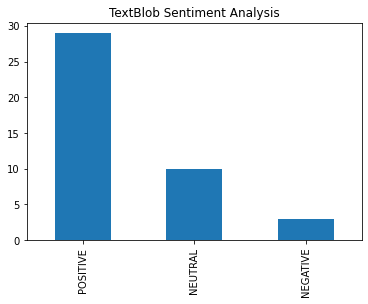

In [27]:
textBlob.TextBlob_Sentiment_Type.value_counts().plot(kind='bar',title="TextBlob Sentiment Analysis")

## Vader

In [28]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader_df = clean_df.loc[clean_df['Language']=='English']

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [29]:
vader_df['vader_scores'] = vader_df['Comment'].apply(lambda Comment: sid.polarity_scores(Comment))
vader_df.head()

<ipython-input-29-89412567477f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vader_df['vader_scores'] = vader_df['Comment'].apply(lambda Comment: sid.polarity_scores(Comment))


,Author,Comment,Timestamp,Likes,TotalReplies,Language,vader_scores
0,Rick Astley,1 billion views for never gonna give you up am...,2021-07-28T21:00:32Z,1166879,497,English,"{'neg': 0.127, 'neu': 0.476, 'pos': 0.397, 'co..."
1,H1K,this isnt your first time here and you know it,2019-10-31T21:38:49Z,994100,494,English,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
6,Dylan,its come to the point that being rickrolled is...,2019-12-13T18:58:53Z,157769,490,English,"{'neg': 0.0, 'neu': 0.783, 'pos': 0.217, 'comp..."
8,Peanut,no matter what you say you got rick rolled don...,2023-01-03T19:29:05Z,4,0,English,"{'neg': 0.153, 'neu': 0.628, 'pos': 0.219, 'co..."
11,dumb bee FBI edition,sometimes you just gotta rickroll yourself bec...,2019-07-23T06:54:55Z,143827,481,English,"{'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compou..."


In [33]:
vader_df['compound'] = vader_df['vader_scores'].apply(lambda score_dict: score_dict['compound'])
vader_df['vader_sentiment_type']=''
vader_df.loc[vader_df.compound>0,'vader_sentiment_type']='POSITIVE'
vader_df.loc[vader_df.compound==0,'vader_sentiment_type']='NEUTRAL'
vader_df.loc[vader_df.compound<0,'vader_sentiment_type']='NEGATIVE'

<ipython-input-33-69a074b60d0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vader_df['compound'] = vader_df['vader_scores'].apply(lambda score_dict: score_dict['compound'])
<ipython-input-33-69a074b60d0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vader_df['vader_sentiment_type']=''
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [34]:
vader_df.vader_sentiment_type.value_counts()

POSITIVE    23
NEUTRAL     15
NEGATIVE     4
Name: vader_sentiment_type, dtype: int64

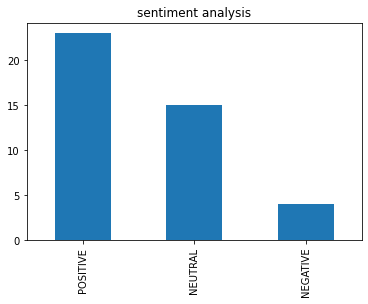

In [35]:
vader_df.vader_sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

## Comparison

In [ ]:
vader_df.groupby(['vader_sentiment_type']).head()

After the initial analysis and visual inspection. There are more positive and negative counts using TextBlob than Vader.

I think TextBlob is closer to the sentiment outcomes that I expect. Hence picking TextBlob for Sentiment analysis.

# DASHBOARD

A few insights that we draw:
1. Top 10 liked comments
2. Top 10 replies comments
3. World Cloud
4. Top languages commented in
5. Sentiment analysis on the English comments

## FUNCTIONS

In [ ]:
url = 'https://www.youtube.com/watch?v=dQw4w9WgXcQ'

In [ ]:
video_id = url.split('?v=')[-1]
video_id

In [ ]:
from googleapiclient.discovery import build
import pandas as pd
from cleantext import clean
from langdetect import detect
import pycountry
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

def parse_video(url) -> pd.DataFrame:
  """
  Args:
    url: URL Of the video to be parsed 
  Returns:
    Dataframe with the processed and cleaned values
  """
  api_key = '{api_secret}'
  
  # Get the video_id from the url
  video_id = url.split('?v=')[-1]

  # creating youtube resource object
  youtube = build('youtube', 'v3',
  developerKey=api_key)

  # retrieve youtube video results
  video_response=youtube.commentThreads().list(
  part='snippet',
  maxResults=1000,
  order='relevance',
  videoId=video_id
  ).execute()

  # empty list for storing reply
  comments = []

  # extracting required info from each result object
  for item in video_response['items']:

    # Extracting comments
    comment = item['snippet']['topLevelComment']['snippet']['textOriginal']
    # Extracting author
    author = item['snippet']['topLevelComment']['snippet']['authorDisplayName']
    # Extracting published time
    published_at = item['snippet']['topLevelComment']['snippet']['publishedAt']
    # Extracting likes
    like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
    # Extracting total replies to the comment
    reply_count = item['snippet']['totalReplyCount']

    comments.append([author, comment, published_at, like_count, reply_count])
  
  df = pd.DataFrame({'Author': [i[0] for i in comments], 
                     'Comment': [i[1] for i in comments], 
                     'Timestamp': [i[2] for i in comments],
                  'Likes': [i[3] for i in comments], 
                  'TotalReplies': [i[4] for i in comments]})
  
  # Remove extra spaces and make them lower case. Replace special emojis
  df['Comment'] = df['Comment'].apply(lambda x: x.strip().lower().
                                      replace('xd','').replace('<3',''))

  # Clean text from line breaks, unicodes, emojis and punctuations
  df['Comment'] = df['Comment'].apply(lambda x: clean(x, 
                                                      no_emoji=True, 
                                                      no_punct=True,
                                                      no_line_breaks=True,
                                                      fix_unicode=True))
  
  # Detect the languages of the comments
  df['Language'] = df['Comment'].apply(lambda x: detect(x))

  # Convert ISO country codes to Languages
  df['Language'] = df['Language'].apply(lambda x: 
                                        pycountry.languages.get(alpha_2=x).name)
  
  # New variable for TextBlob approach
  textBlob = df.loc[df['Language']=='English']

  # Determining the polarity
  textBlob['TextBlob_Polarity'] = textBlob['Comment'].apply(get_polarity)

  textBlob['TextBlob_Sentiment_Type']=''
  textBlob.loc[textBlob.TextBlob_Polarity>0,'TextBlob_Sentiment_Type']='POSITIVE'
  textBlob.loc[textBlob.TextBlob_Polarity==0,'TextBlob_Sentiment_Type']='NEUTRAL'
  textBlob.loc[textBlob.TextBlob_Polarity<0,'TextBlob_Sentiment_Type']='NEGATIVE'

  return textBlob


## STREAMLIT

In [ ]:
pip install streamlit

In [ ]:
pip install --upgrade protobuf

In [ ]:
import streamlit as st 
st.set_page_config(
    page_title="Real-Time Data Science Dashboard",
    page_icon="✅",
    layout="wide",
)
st.markdown("### Detailed Data View")
st.dataframe(clean_df)

In [ ]:
!streamlit run /usr/local/lib/python3.8/dist-packages/ipykernel_launcher.py